<a href="https://colab.research.google.com/github/etemadism/Courses/blob/main/01_One_Sample_T_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#One-Sample T-Test Analysis

This Google Colab notebook, authored by **A. Etemadi**, is designed for a **Statistics class** and provides a comprehensive guide to performing a one-sample t-test in Python. The notebook is structured into two parts:

1. **Simple Example**:
   - In this section, we demonstrate the Python implementation of a one-sample t-test using a hypothetical dataset.  
   - The known population mean is \(50 \, \mu\text{mol/min/mg}\), representing the enzyme activity in healthy cells.  
   - A sample of 20 experimental observations is analyzed step-by-step to determine whether the treatment leads to a statistically significant change in the average enzyme activity.

2. **Real-World Example**:
   - Here, we extend the analysis to a real dataset loaded from a CSV file. The dataset contains measurements across multiple columns, and we perform:
     - **Normality tests** (Shapiro-Wilk or Kolmogorov-Smirnov, based on sample size) to ensure the assumptions of the t-test are met.
     - One-sample t-tests for each column to determine if the sample means significantly differ from the specified population mean.  

This hands-on approach helps students understand the mechanics of hypothesis testing, the importance of checking assumptions, and the interpretation of results. By the end of this notebook, students will gain practical experience with statistical hypothesis testing using Python.

#Simple toturial

###Normality check

In [2]:
from scipy.stats import shapiro
stat, p_value = shapiro(sample_data)
print("Shapiro-Wilk Test:", "Statistic =", stat, ", p-value =", p_value)
# Interpretation
if p_value > 0.05:
  print("Data appears to be normally distributed (fail to reject H0)")
else: print("Data does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Test: Statistic = 0.9616882117021169 , p-value = 0.5781019650776487
Data appears to be normally distributed (fail to reject H0)


In [4]:
from scipy.stats import kstest
stat, p_value = kstest(sample_data, 'norm')
print("Kolmogorov-Smirnov Test:", "Statistic =", stat, ", p-value =", p_value)

# Interpretation
if p_value > 0.05:
  print("Data appears to be normally distributed (fail to reject H0)")
else: print("Data does not appear to be normally distributed (reject H0)")

Kolmogorov-Smirnov Test: Statistic = 1.0 , p-value = 0.0
Data does not appear to be normally distributed (reject H0)


####box-plot and Q-Q plot

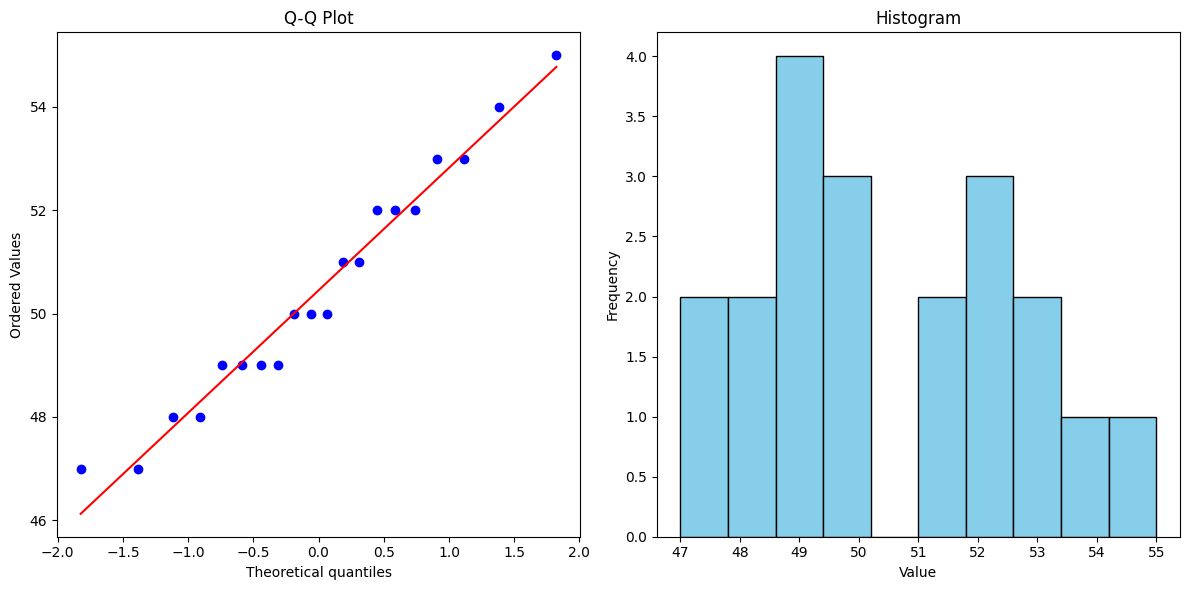

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Sample data
sample_data = np.array([52, 49, 51, 53, 47, 50, 54, 55, 48, 49,
                        51, 53, 50, 52, 49, 47, 50, 52, 48, 49])

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot
stats.probplot(sample_data, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot")

# Histogram
axes[1].hist(sample_data, bins=10, color='skyblue', edgecolor='black')
axes[1].set_title("Histogram")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

# Show plots
plt.tight_layout()
plt.show()


##Step 1: Set Up the Data and Hypotheses

In [1]:
import numpy as np
from scipy import stats

# Known population mean for enzyme activity (in µmol/min/mg)
population_mean = 50

# Sample data: enzyme activity levels after treatment (in µmol/min/mg)
sample_data = np.array([52, 49, 51, 53, 47, 50, 54, 55, 48, 49,
                        51, 53, 50, 52, 49, 47, 50, 52, 48, 49])

##Step 2: Calculate the Sample Mean and Standard Deviation

In [2]:

# Calculate sample statistics
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)

print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")

Sample Mean: 50.45
Sample Standard Deviation: 2.282081229238369


##Step 3: Calculate the t-Statistic and p-value

In [3]:

n = len(sample_data)

# Perform One-Sample t-Test
t_statistic, p_value = stats.ttest_1samp(sample_data, population_mean)



##Step 5: Interpret the Results

In [5]:

# Interpretation
alpha = 0.05
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: The average enzyme activity level in the sample is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the sample mean and the population mean.")


Sample Mean: 50.45
Sample Standard Deviation: 2.282081229238369
T-Statistic: 0.8818534388547906
P-Value: 0.3888764167256987
Fail to reject the null hypothesis: No significant difference between the sample mean and the population mean.


##Full Python Code for One-Sample t-Test


In [ ]:
import numpy as np
from scipy import stats

# Known population mean for enzyme activity (in µmol/min/mg)
population_mean = 50

# Sample data: enzyme activity levels after treatment (in µmol/min/mg)
sample_data = np.array([52, 49, 51, 53, 47, 50, 54, 55, 48, 49,
                        51, 53, 50, 52, 49, 47, 50, 52, 48, 49])

# Calculate sample statistics
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)
n = len(sample_data)

# Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# Degrees of freedom
df = n - 1

# Calculate the p-value (two-tailed test)
p_value = stats.t.sf(np.abs(t_statistic), df) * 2

# Interpretation
alpha = 0.05
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: The average enzyme activity level in the sample is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the sample mean and the population mean.")


# Real example

In [12]:
import pandas as pd
from scipy import stats

# Load the CSV file
url = 'https://drive.google.com/uc?id=1HYYvAncOfyWXFQrJd9YsKhObK59jaRd0'
df = pd.read_csv(url)

# Subset columns 1 to 4
columns_to_test = df.iloc[:, 0:4]

# Known population mean
population_mean = 50

# Loop over each column
for col in columns_to_test.columns:
    sample_data = columns_to_test[col].dropna()  # Drop NaN values
    sample_size = len(sample_data)

    print(f"Column: {col}")
    print(f"Sample size: {sample_size}")

    # Decide the normality test based on sample size
    if sample_size < 50:
        # Use Shapiro-Wilk Test
        stat, p_value_normality = stats.shapiro(sample_data)
        test_name = "Shapiro-Wilk Test"
    else:
        # Use Kolmogorov-Smirnov Test
        stat, p_value_normality = stats.kstest(sample_data, 'norm', args=(sample_data.mean(), sample_data.std(ddof=1)))
        test_name = "Kolmogorov-Smirnov Test"

    print(f"{test_name} for Normality: Statistic={stat:.4f}, P-value={p_value_normality:.4f}")

    if p_value_normality < 0.05:
        print("The data does not follow a normal distribution (p < 0.05).")
    else:
        print("The data appears to follow a normal distribution (p ≥ 0.05).")

    # Perform a one-sample t-test
    t_statistic, p_value_ttest = stats.ttest_1samp(sample_data, population_mean)
    print(f"One-Sample T-Test: T-Statistic={t_statistic:.4f}, P-value={p_value_ttest:.4f}")

    # Interpretation
    alpha = 0.05
    if p_value_ttest < alpha:
        print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between the sample mean and the population mean.")
    print("-" * 50)


Column: Age
Sample size: 400
Kolmogorov-Smirnov Test for Normality: Statistic=0.1815, P-value=0.0000
The data does not follow a normal distribution (p < 0.05).
One-Sample T-Test: T-Statistic=60.5123, P-value=0.0000
Reject the null hypothesis: The sample mean is significantly different from the population mean.
--------------------------------------------------
Column: Gender
Sample size: 400
Kolmogorov-Smirnov Test for Normality: Statistic=0.3591, P-value=0.0000
The data does not follow a normal distribution (p < 0.05).
One-Sample T-Test: T-Statistic=-1983.7879, P-value=0.0000
Reject the null hypothesis: The sample mean is significantly different from the population mean.
--------------------------------------------------
Column: DM
Sample size: 400
Kolmogorov-Smirnov Test for Normality: Statistic=0.4582, P-value=0.0000
The data does not follow a normal distribution (p < 0.05).
One-Sample T-Test: T-Statistic=-2237.4925, P-value=0.0000
Reject the null hypothesis: The sample mean is sign